<a href="https://colab.research.google.com/github/borosimon/My-app-todo/blob/main/preprocessing_uvbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#montage du drive

In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


#import des biblioteque necessaire

In [ ]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Charger les données depuis un fichier Excel

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AMD_Training/Offres_qui_interresse_AMD.xlsx')

#Définir les fonctions de prétraitement du texte

In [ ]:
def preprocess_text(text):
    """
    Tokenise le texte, enlève les stopwords et les mots de moins de 3 caractères, et lemmatise les mots.
    """
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and len(token) > 2]
    return ' '.join(lemmatized_tokens)

def preprocess_corpus(corpus):
    """
    Applique preprocess_text à chaque document du corpus.
    """
    return [preprocess_text(doc) for doc in corpus]

#Charger le modèle spaCy pour le français

In [ ]:
!python -m spacy download fr_core_news_sm
nlp = spacy.load('fr_core_news_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 38.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#Définir les fonctions de prétraitement du texte

In [ ]:
import spacy
from nltk.stem import PorterStemmer

# Charger le modèle de langue français de Spacy
nlp = spacy.load("fr_core_news_sm")
stemmer = PorterStemmer()

def tokenize_text(text):
    """
    Tokenise le texte.
    """
    doc = nlp(text)
    tokens = [token.text for token in doc]
    print(f"Tokenisation: {tokens}")
    return tokens

def remove_stopwords(tokens):
    """
    Enlève les stopwords et les mots de moins de 3 caractères.
    """
    filtered_tokens = [token for token in tokens if not nlp.vocab[token].is_stop and len(token) > 2]
    print(f"Suppression des stopwords: {filtered_tokens}")
    return filtered_tokens

def lemmatize_tokens(tokens):
    """
    Lemmatisation des tokens.
    """
    lemmatized_tokens = [nlp(token)[0].lemma_ for token in tokens]
    print(f"Lemmatisation: {lemmatized_tokens}")
    return lemmatized_tokens

def stem_tokens(tokens):
    """
    Stemmatise les tokens.
    """
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    print(f"Stemmatisation: {stemmed_tokens}")
    return stemmed_tokens

def preprocess_text(text):
    """
    Applique les étapes de tokenisation, suppression des stopwords, lemmatisation et stemmatisation avec affichage intermédiaire.
    """
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize_tokens(tokens)
    stemmed_tokens = stem_tokens(lemmatized_tokens)
    return ' '.join(stemmed_tokens)

def preprocess_corpus(corpus):
    """
    Applique preprocess_text à chaque document du corpus.
    """
    return [preprocess_text(doc) for doc in corpus]

# Exemple d'utilisation
corpus = ["Ceci est un exemple de phrase à prétraiter.", "La deuxième phrase du corpus."]
processed_corpus = preprocess_corpus(corpus)

for i, doc in enumerate(processed_corpus):
    print(f"Document {i+1}: {doc}")


Tokenisation: ['Ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter', '.']
Suppression des stopwords: ['exemple', 'phrase', 'prétraiter']
Lemmatisation: ['exemple', 'phras', 'prétraiter']
Stemmatisation: ['exempl', 'phra', 'prétraiter']
Tokenisation: ['La', 'deuxième', 'phrase', 'du', 'corpus', '.']
Suppression des stopwords: ['phrase', 'corpus']
Lemmatisation: ['phras', 'corpus']
Stemmatisation: ['phra', 'corpu']
Document 1: exempl phra prétraiter
Document 2: phra corpu


#Prétraitement des données

In [ ]:
data = preprocess_corpus(df['A'])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Tokenisation: ['EOI', '-', 'Niger', '-', 'Charge', 'of', 'the', 'external', 'audit', 'of', 'the', 'accounts', 'of', 'PIDACC', '/', 'NB’', 'S', 'Regional', 'Coordinating', 'Unit', '(', 'RCU', ')', 'within', 'the', 'framework', 'of', 'the', 'Niger', 'Basin', 'Authority', '(', 'NBA', ')']
Suppression des stopwords: ['EOI', 'Niger', 'Charge', 'the', 'external', 'audit', 'the', 'accounts', 'PIDACC', 'NB’', 'Regional', 'Coordinating', 'Unit', 'RCU', 'within', 'the', 'framework', 'the', 'Niger', 'Basin', 'Authority', 'NBA']
Lemmatisation: ['eoi', 'Niger', 'charge', 'the', 'external', 'audit', 'the', 'account', 'PIDACC', 'nb', 'Regional', 'Coordinating', 'Unit', 'RCU', 'within', 'the', 'framework', 'the', 'Niger', 'Basin', 'Authority', 'NBA']
Stemmatisation: ['eoi', 'niger', 'charg', 'the', 'extern', 'audit', 'the', 'account', 'pidacc', 'nb', 'region', 'coordin', 'unit', 'rcu', 'within', 'the', 'framework', 'the', 'n

#Vectorisation avec TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

In [ ]:
def tfidf_vectorize(data):
    """
    Vectorise les données textuelles avec TF-IDF et affiche la matrice résultante.
    """
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(data)

    # Afficher les termes (caractéristiques) extraits par le vectoriseur
    feature_names = vectorizer.get_feature_names_out()

    # Afficher la matrice TF-IDF sous forme dense pour mieux voir les valeurs
    tfidf_matrix = X.toarray()

    print("\nMatrice TF-IDF :")
    for i, doc in enumerate(tfidf_matrix):
        print(f"Document {i+1}: {doc}")

    return X

# Exemple d'utilisation
corpus = ["Ceci est un exemple de phrase à prétraiter.", "La deuxième phrase du corpus."]
processed_corpus = preprocess_corpus(corpus)

# Vectorisation TF-IDF
X = tfidf_vectorize(processed_corpus)


Tokenisation: ['Ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter', '.']
Suppression des stopwords: ['exemple', 'phrase', 'prétraiter']
Lemmatisation: ['exemple', 'phras', 'prétraiter']
Stemmatisation: ['exempl', 'phra', 'prétraiter']
Tokenisation: ['La', 'deuxième', 'phrase', 'du', 'corpus', '.']
Suppression des stopwords: ['phrase', 'corpus']
Lemmatisation: ['phras', 'corpus']
Stemmatisation: ['phra', 'corpu']

Matrice TF-IDF :
Document 1: [0.         0.6316672  0.44943642 0.6316672 ]
Document 2: [0.81480247 0.         0.57973867 0.        ]


#Visualisation des résultats TF-IDF

Tokenisation: ['Ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter', '.']
Suppression des stopwords: ['exemple', 'phrase', 'prétraiter']
Lemmatisation: ['exemple', 'phras', 'prétraiter']
Stemmatisation: ['exempl', 'phra', 'prétraiter']
Tokenisation: ['La', 'deuxième', 'phrase', 'du', 'corpus', '.']
Suppression des stopwords: ['phrase', 'corpus']
Lemmatisation: ['phras', 'corpus']
Stemmatisation: ['phra', 'corpu']

Matrice TF-IDF :
Document 1: [0.         0.6316672  0.44943642 0.6316672 ]
Document 2: [0.81480247 0.         0.57973867 0.        ]


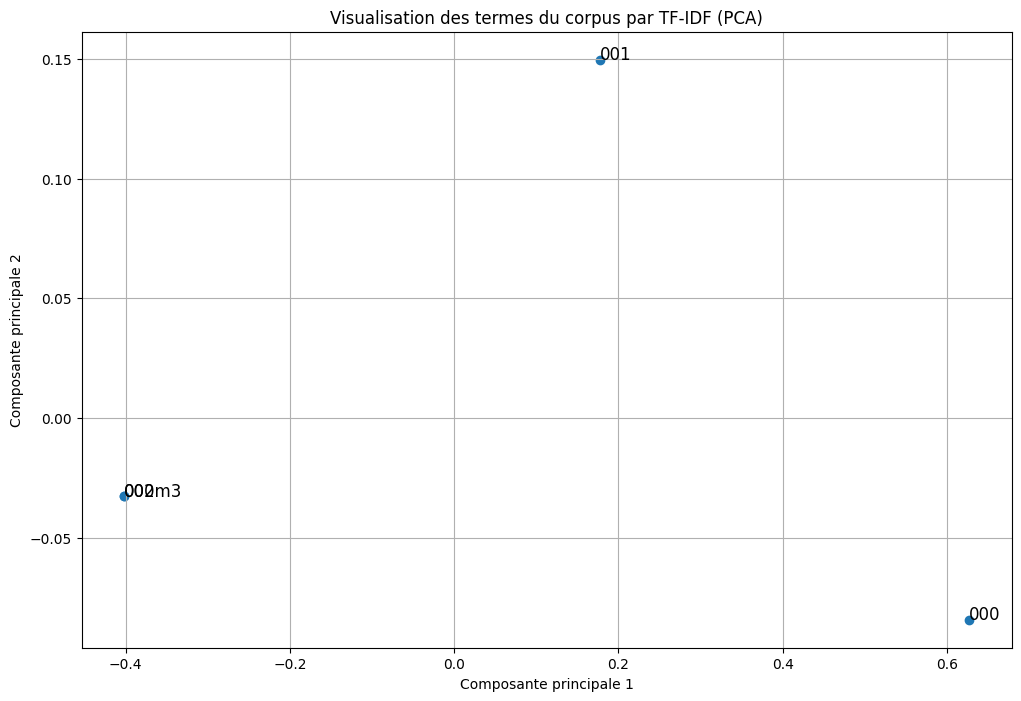

In [ ]:
def plot_tfidf_terms(X, feature_names):
    """
    Affiche une visualisation 2D de tous les termes du corpus après réduction de dimension avec PCA.
    """
    X_transposed = X.T  # Transpose pour que chaque terme soit une ligne

    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X_transposed.toarray())

    plt.figure(figsize=(12, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o')

    for i in range(min(len(feature_names), X_reduced.shape[0])):
        plt.annotate(feature_names[i], xy=(X_reduced[i, 0], X_reduced[i, 1]), fontsize=12)

    plt.title("Visualisation des termes du corpus par TF-IDF (PCA)")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.grid(True)
    plt.show()

# Exemple d'utilisation avec le TF-IDF
corpus = ["Ceci est un exemple de phrase à prétraiter.", "La deuxième phrase du corpus."]
processed_corpus = preprocess_corpus(corpus)
X = tfidf_vectorize(processed_corpus)

plot_tfidf_terms(X, vectorizer.get_feature_names_out())

#Word embeding

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

def tokenize_for_embedding(corpus):
    """
    Tokenise le corpus en une liste de tokens pour chaque document.
    """
    return [nltk.word_tokenize(doc) for doc in corpus]

def train_word2vec(corpus, vector_size=100, window=5, min_count=1):
    """
    Entraîne un modèle Word2Vec sur le corpus donné et affiche les vecteurs de mots.
    """
    tokenized_corpus = tokenize_for_embedding(corpus)

    # Entraîner le modèle Word2Vec
    model = Word2Vec(sentences=tokenized_corpus, vector_size=vector_size, window=window, min_count=min_count)

    # Afficher les embeddings pour chaque mot dans le corpus
    for word in model.wv.index_to_key:
        print(f"Embedding de '{word}': {model.wv[word]}")

    return model

# Exemple d'utilisation
corpus = ["Ceci est un exemple de phrase à prétraiter.", "La deuxième phrase du corpus."]
processed_corpus = preprocess_corpus(corpus)

# Entraînement du modèle Word2Vec
word2vec_model = train_word2vec(processed_corpus)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenisation: ['Ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter', '.']
Suppression des stopwords: ['exemple', 'phrase', 'prétraiter']
Lemmatisation: ['exemple', 'phras', 'prétraiter']
Stemmatisation: ['exempl', 'phra', 'prétraiter']
Tokenisation: ['La', 'deuxième', 'phrase', 'du', 'corpus', '.']
Suppression des stopwords: ['phrase', 'corpus']
Lemmatisation: ['phras', 'corpus']
Stemmatisation: ['phra', 'corpu']
Embedding de 'phra': [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03


#Afficher le graphe Word embeding

Tokenisation: ['Ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter', '.']
Suppression des stopwords: ['exemple', 'phrase', 'prétraiter']
Lemmatisation: ['exemple', 'phras', 'prétraiter']
Stemmatisation: ['exempl', 'phra', 'prétraiter']
Tokenisation: ['La', 'deuxième', 'phrase', 'du', 'corpus', '.']
Suppression des stopwords: ['phrase', 'corpus']
Lemmatisation: ['phras', 'corpus']
Stemmatisation: ['phra', 'corpu']


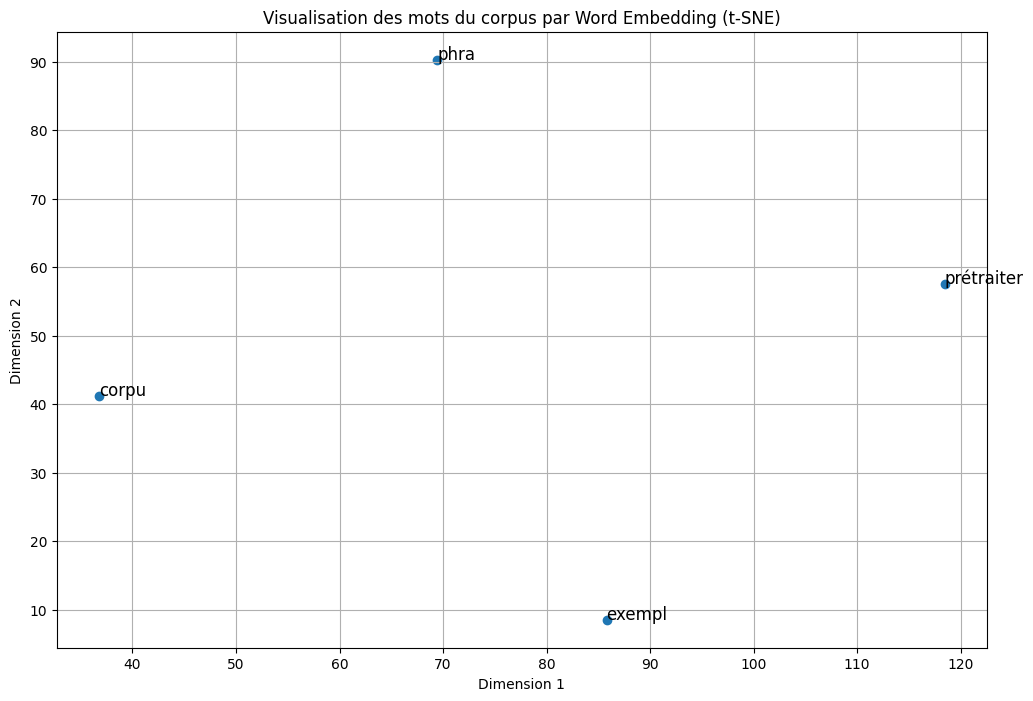

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_word_embeddings(model, perplexity=5):
    """
    Affiche une visualisation 2D des mots du corpus après réduction de dimension avec t-SNE.
    """
    words = list(model.wv.index_to_key)
    word_vectors = np.array([model.wv[word] for word in words])

    # Assurez-vous que perplexity est moins que le nombre d'échantillons
    perplexity = min(perplexity, len(words) - 1)

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    word_vectors_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

    for i in range(len(words)):
        plt.annotate(words[i], xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

    plt.title("Visualisation des mots du corpus par Word Embedding (t-SNE)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

# Exemple d'utilisation avec Word2Vec
from gensim.models import Word2Vec

# Entraînement du modèle Word2Vec
def train_word2vec(corpus):
    tokenized_corpus = [doc.split() for doc in corpus]
    model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Exemple d'utilisation
corpus = ["Ceci est un exemple de phrase à prétraiter.", "La deuxième phrase du corpus."]
processed_corpus = preprocess_corpus(corpus)
word2vec_model = train_word2vec(processed_corpus)

plot_word_embeddings(word2vec_model, perplexity=5)